# Business Understanding  

## Background Information  

SyriaTel is a telecommunications company that faces customer churn.   
The business wants to:  
* Predict which customers are most likely to stop doing business with SyriaTel.  
* Understand the key factors driving customer churn.  
* Take action to retain at-risk customers through targetd interventions such as promotions, improved customer support or loyalty programs.   

## Problem Statement 

Customer churn reduces revenue, increases acquistion costs, loss of market share to competitors and damaged brand reputation. High churn rates indicate potential issues with customer satisfication, network quality or pricing strategies. This project aims to predict customer churn using a binary classification model. 
 * Churn = 1 (customer leaves)
 * Churn = 0 (customer stays) 
  
## Objectives 
* Develop a predictive model to flag customers at high risk of churn.
* Generate interpretable insights into why customers leave.  
* Provide actionable recommndations for retention strategies. 
  
## Metrics of Success 
1. Recall(Sensitivity): Ability to correctly identify churners.
2. Precision: Proportion of predicted churners who actually churn. 
3. FI Score: Balance between precision and recall.
4. ROC-AUC Score: Overall model ability to distinguish churners from non-churners.


# Data Understanding 

## Initial Data Exploration(IDE) 

In [33]:
#import libraries
import pandas as pd 
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
import warnings 
warnings.filterwarnings("ignore") 

#sklearn libraries
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from imblearn.over_sampling import SMOTE, SMOTEN 
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from scipy.stats import randint
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve




In [34]:
#load dataset
st_df = pd.read_csv("bigml_59c28831336c6604c800002a.csv")
#check head
st_df.head() 

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [35]:
#display shape
print(f"The dataset has {st_df.shape[0]} rows and {st_df.shape[1]} columns.")

The dataset has 3333 rows and 21 columns.


In [36]:
#info
st_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account length          3333 non-null   int64  
 2   area code               3333 non-null   int64  
 3   phone number            3333 non-null   object 
 4   international plan      3333 non-null   object 
 5   voice mail plan         3333 non-null   object 
 6   number vmail messages   3333 non-null   int64  
 7   total day minutes       3333 non-null   float64
 8   total day calls         3333 non-null   int64  
 9   total day charge        3333 non-null   float64
 10  total eve minutes       3333 non-null   float64
 11  total eve calls         3333 non-null   int64  
 12  total eve charge        3333 non-null   float64
 13  total night minutes     3333 non-null   float64
 14  total night calls       3333 non-null   

Observation: The dataset comprises 16 numerical and 5 categorical columns.

### Column Explanations

1. **state**

* U.S. state where the customer resides.

2. **account length**

* Number of days the customer has had an account.

3. **area code**

* Area code of the customer’s phone number.


4. **international plan**

 * Whether the customer subscribes to an international calling plan(yes/no).


5. **voice mail plan**

* Whether the customer subscribes to a voice mail plan(yes/no).


6. **number vmail messages** 

 * Number of voice mail messages.

7. **total day minutes**

 * Total number of minutes customer used the phone during the day.

8. **total day calls** 

* Total number of calls during the day. 

9. **total day charge**

* Total amount charged for daytime calls. 

10. **total eve minutes**

* Total evening call minutes.

11. **total eve calls**

* Total number of evening calls.

12. **total eve charge**

* Total amount charged for evening calls.

13. **total night minutes**

* Total night call minutes.

14. **total night calls**

* Total number of night calls.

15. **total night charge** 

* Total amount charged for night calls.

16. **total intl minutes**

* Total international call minutes.

17. **total intl calls**

* Total number of international calls.

18. **total intl charge** 

* Total amount charged for international calls.

19. **customer service calls**

* Number of calls made to customer service.

20. **churn**

* Target variable: whether the customer stopped doing business with SyriaTel.
  
* True = churned, False = stayed.


In [37]:
#statistical summary of numerical columns
st_df.describe().T

,count,mean,std,min,25%,50%,75%,max
account length,3333.0,101.064806,39.822106,1.00,74.00,101.00,127.00,243.00
area code,3333.0,437.182418,42.371290,408.00,408.00,415.00,510.00,510.00
number vmail messages,3333.0,8.099010,13.688365,0.00,0.00,0.00,20.00,51.00
total day minutes,3333.0,179.775098,54.467389,0.00,143.70,179.40,216.40,350.80
total day calls,3333.0,100.435644,20.069084,0.00,87.00,101.00,114.00,165.00
total day charge,3333.0,30.562307,9.259435,0.00,24.43,30.50,36.79,59.64
total eve minutes,3333.0,200.980348,50.713844,0.00,166.60,201.40,235.30,363.70
total eve calls,3333.0,100.114311,19.922625,0.00,87.00,100.00,114.00,170.00
total eve charge,3333.0,17.083540,4.310668,0.00,14.16,17.12,20.00,30.91
total night minutes,3333.0,200.872037,50.573847,23.20,167.00,201.20,235.30,395.00


Observation: Customer Service Calls

Mean = 1.56, Median = 1, Max = 9.

Most customers call once or not at all, but a few call 6–9 times → likely dissatisfaction → strong churn predictor. 

Account Length

Mean ≈ 101 days, Min = 1, Max = 243.

Very wide spread. This could indicate both brand-new and long-term customers.

Churn rate may differ between new vs. long-term customers. 

Voicemail Messages

Mean = 8.1, Median = 0, Max = 51.

Most customers have zero voicemail messages.

This may align with whether they subscribe to the voice mail plan.

Usage Patterns (Day / Evening / Night)
Metric	Day	Evening	Night
Minutes (mean)	179.8	201.0	200.9
Calls (mean)	100.4	100.1	100.1
Charges (mean)	30.6	17.1	9.0

Customers spend more minutes in the evening but highest charges in the day because day rates are higher.

Call counts are similar (~100) across day/eve/night but charges vary dramatically. 

International Usage

Mean intl minutes = 10.2, Max = 20.

Mean intl calls = 4.5, Max = 20.

Most customers make few international calls; a small group makes many.

International plan customers may have lower charges per minute.

In [38]:
#statistical summary for categorical columns 
st_df.describe(include='O').T

,count,unique,top,freq
state,3333,51,WV,106
phone number,3333,3333,382-4657,1
international plan,3333,2,no,3010
voice mail plan,3333,2,no,2411


Observation: 
State

51 unique states, top = WV (West Virginia) with 106 customers.

Fairly evenly spread across states, but some states have more customers.

Because state behaves like a region indicator, it might be worth grouping into regions or treating as categorical with dummy variables.

Churn can be compared across states to see geographic differences.

Phone Number

3333 unique values (one per customer).

This is just an identifier, not a feature.

Drop it from your modeling dataset.

International Plan

2 categories: yes and no.

Most customers (3010) don’t have an international plan.

This could strongly relate to churn; typically customers on international plans may behave differently in call usage and retention.


Voice Mail Plan

2 categories: yes and no.

Most customers (2411) don’t have a voice mail plan.

Another key categorical variable that can be used directly or as a dummy variable.

You can also cross-tabulate it with number of voicemail messages to check consistency.




In [39]:
#check nulls 
st_df.isna().sum()

state                     0
account length            0
area code                 0
phone number              0
international plan        0
voice mail plan           0
number vmail messages     0
total day minutes         0
total day calls           0
total day charge          0
total eve minutes         0
total eve calls           0
total eve charge          0
total night minutes       0
total night calls         0
total night charge        0
total intl minutes        0
total intl calls          0
total intl charge         0
customer service calls    0
churn                     0
dtype: int64

In [40]:
#check duplicates 
st_df.duplicated().sum()

0

In [41]:
#count churned vs. non-churned to understand class imbalance
st_df['churn'].value_counts(ascending=False) 

churn
False    2850
True      483
Name: count, dtype: int64

Observation:   
In the SyriaTel dataset, the majority of customers are non-churners.

Roughly 85–90% of the observations are False (no churn) and only about 10–15% are True (churn).

This shows a significant class imbalance — churners are much fewer than non-churners.

In [42]:
#unique values for each categorical columns
for col in st_df.select_dtypes(include='object').columns:
    print(f"\nColumn:{col}")
    print(st_df[col].unique())


Column:state
['KS' 'OH' 'NJ' 'OK' 'AL' 'MA' 'MO' 'LA' 'WV' 'IN' 'RI' 'IA' 'MT' 'NY'
 'ID' 'VT' 'VA' 'TX' 'FL' 'CO' 'AZ' 'SC' 'NE' 'WY' 'HI' 'IL' 'NH' 'GA'
 'AK' 'MD' 'AR' 'WI' 'OR' 'MI' 'DE' 'UT' 'CA' 'MN' 'SD' 'NC' 'WA' 'NM'
 'NV' 'DC' 'KY' 'ME' 'MS' 'TN' 'PA' 'CT' 'ND']

Column:phone number
['382-4657' '371-7191' '358-1921' ... '328-8230' '364-6381' '400-4344']

Column:international plan
['no' 'yes']

Column:voice mail plan
['yes' 'no']


In [43]:
#correlation check
st_df.corr(numeric_only=True)

,account length,area code,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
account length,1.000000,-0.012463,-0.004628,0.006216,0.038470,0.006214,-0.006757,0.019260,-0.006745,-0.008955,-0.013176,-0.008960,0.009514,0.020661,0.009546,-0.003796,0.016541
area code,-0.012463,1.000000,-0.001994,-0.008264,-0.009646,-0.008264,0.003580,-0.011886,0.003607,-0.005825,0.016522,-0.005845,-0.018288,-0.024179,-0.018395,0.027572,0.006174
number vmail messages,-0.004628,-0.001994,1.000000,0.000778,-0.009548,0.000776,0.017562,-0.005864,0.017578,0.007681,0.007123,0.007663,0.002856,0.013957,0.002884,-0.013263,-0.089728
total day minutes,0.006216,-0.008264,0.000778,1.000000,0.006750,1.000000,0.007043,0.015769,0.007029,0.004323,0.022972,0.004300,-0.010155,0.008033,-0.010092,-0.013423,0.205151
total day calls,0.038470,-0.009646,-0.009548,0.006750,1.000000,0.006753,-0.021451,0.006462,-0.021449,0.022938,-0.019557,0.022927,0.021565,0.004574,0.021666,-0.018942,0.018459
total day charge,0.006214,-0.008264,0.000776,1.000000,0.006753,1.000000,0.007050,0.015769,0.007036,0.004324,0.022972,0.004301,-0.010157,0.008032,-0.010094,-0.013427,0.205151
total eve minutes,-0.006757,0.003580,0.017562,0.007043,-0.021451,0.007050,1.000000,-0.011430,1.000000,-0.012584,0.007586,-0.012593,-0.011035,0.002541,-0.011067,-0.012985,0.092796
total eve calls,0.019260,-0.011886,-0.005864,0.015769,0.006462,0.015769,-0.011430,1.000000,-0.011423,-0.002093,0.007710,-0.002056,0.008703,0.017434,0.008674,0.002423,0.009233
total eve charge,-0.006745,0.003607,0.017578,0.007029,-0.021449,0.007036,1.000000,-0.011423,1.000000,-0.012592,0.007596,-0.012601,-0.011043,0.002541,-0.011074,-0.012987,0.092786
total night minutes,-0.008955,-0.005825,0.007681,0.004323,0.022938,0.004324,-0.012584,-0.002093,-0.012592,1.000000,0.011204,0.999999,-0.015207,-0.012353,-0.015180,-0.009288,0.035493


Observation:   
Customer Service Calls has the highest positive correlation with churn (0.209).

This confirms what we saw earlier — customers who call support frequently are more likely to churn.

Total Day Minutes / Total Day Charge have a moderate positive correlation with churn (0.205).

High day usage (and charges) could be linked to dissatisfaction or billing issues.

Total International Minutes / Total Intl Charge have a smaller positive correlation with churn (≈0.068).

Number of Voicemail Messages has a negative correlation with churn (-0.09).

Customers using voicemail are less likely to churn (possibly more engaged).  

Minutes and Charges for each period (day/eve/night/intl) are perfectly correlated (≈1.0) — redundant.

Very low correlations among most other features — no major multicollinearity except minutes vs. charges.

Why This Matters

Key churn predictors (based on correlation):

Customer Service Calls (strongest)

Total Day Minutes / Charges

Voicemail Messages (inverse relationship)

You can drop either charges or minutes for each period to simplify the model.

Consider feature engineering around customer service calls (e.g., flagging high-call customers).

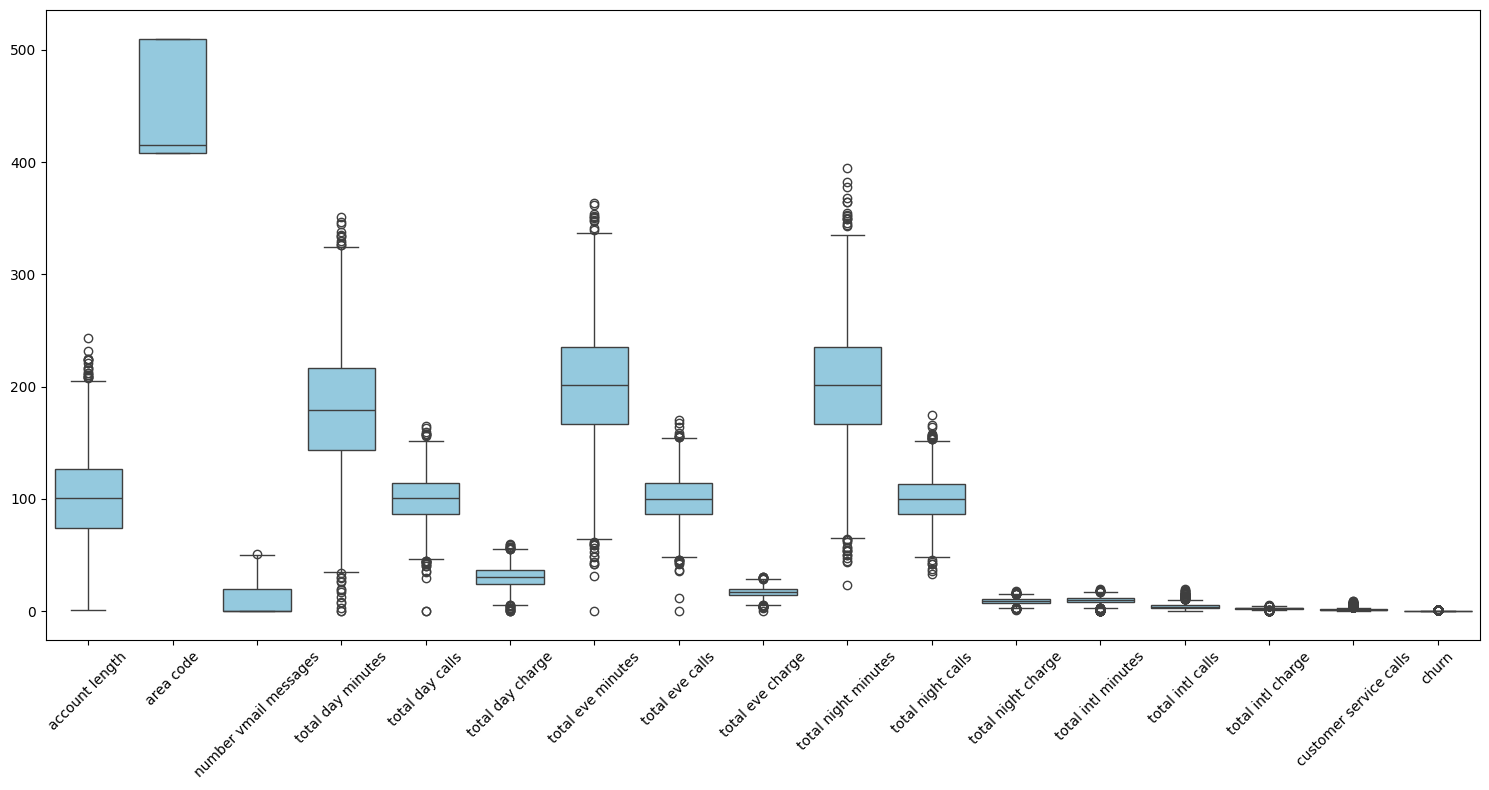

In [44]:
#check for outliers
plt.figure(figsize=(15,8))
sns.boxplot(data=st_df, color="skyblue")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show();


| Feature                                   | Outlier Insight                                                                                                                                                      |
| ----------------------------------------- | -------------------------------------------------------------------------------------------------------------------------------------------------------------------- |
| **Account length**                        | Some customers have extremely short contracts (near 0 days) or very long (200+ days). This could represent new customers or legacy customers.                        |
| **Area code**                             | Treated as numeric but is actually categorical. The “box” looks odd because area codes cluster at discrete values (408, 415, 510). Should be encoded as categorical. |
| **Number vmail messages**                 | Heavy right tail. Most customers have 0 voicemail messages but some have >40, which appears as outliers.                                                             |
| **Total day/eve/night minutes & charges** | Outliers at the high end → customers with unusually heavy usage. (E.g., total day minutes up to 350+ compared to average 179.)                                       |
| **Total day/eve/night calls**             | A few customers make very few calls or far more than typical.                                                                                                        |
| **Total international minutes & calls**   | A small number of customers make a lot of international calls (max 20 compared to average \~4), which show up as outliers.                                           |
| **Customer service calls**                | A few customers have up to 9 calls to customer service (compared to the majority with 1–2), which show as outliers.                                                  |
| **Churn**                                 | This is categorical (0/1) so it plots as just two points, no real outlier interpretation.                                                                            |

Why Outliers Matter in This Dataset

Outliers represent different customer behaviors rather than data errors.

They could be key churn predictors (heavy users or high-contact customers).

Don’t remove them blindly — consider binning, log-transforming, or flagging as “high-usage” customers.


Recommended Next Steps

Area Code → convert to categorical (one-hot).

High Usage Flags → create features like “high international calls” or “high customer service calls.”

Scaling → use StandardScaler or MinMaxScaler before modeling to reduce outlier influence on algorithms sensitive to scale. 



## Data Preparation

### Data Cleaning

In [45]:
#make a copy 
st_df1 = st_df.copy(deep=True)

In [46]:
#remove phone number columns
st_df1 = st_df1.drop(columns=["phone number"])

In [47]:
#remove spaces in column names
st_df1.columns = st_df1.columns.str.replace(" ", "_")

## Exploratory Data Analysis 

### Univariate Analysis 

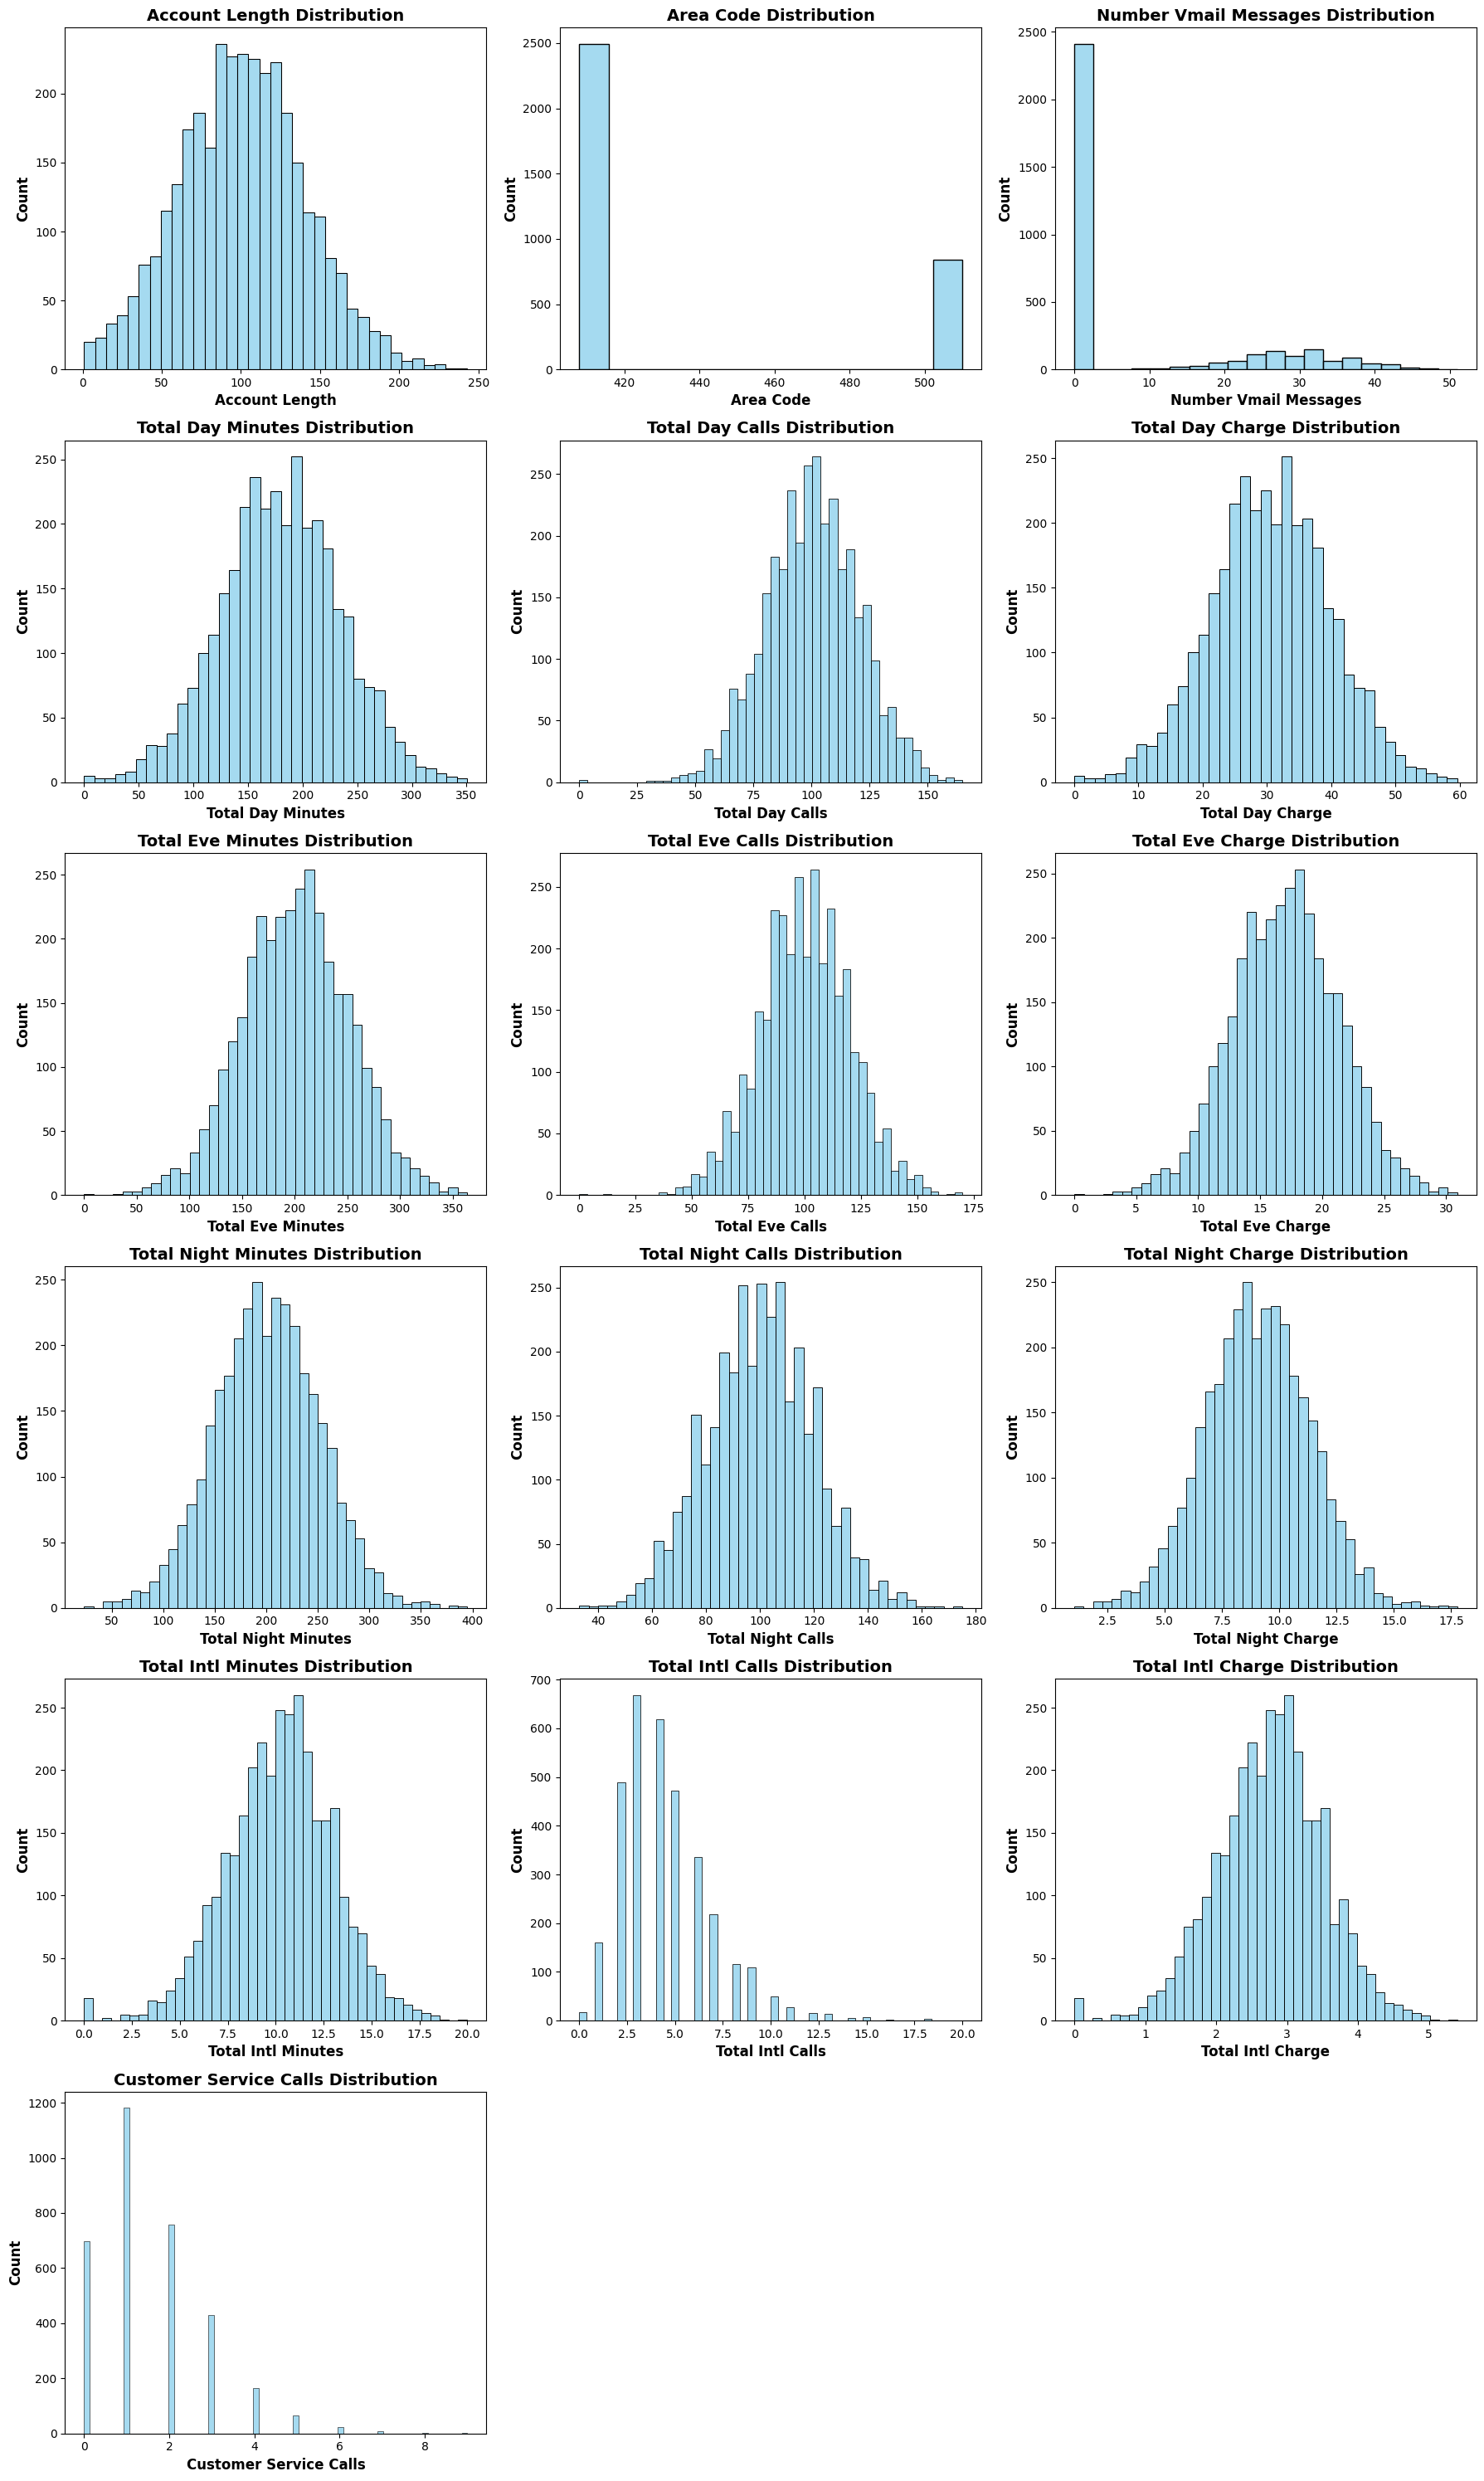

In [48]:
import matplotlib.pyplot as plt
import seaborn as sns

# Select numeric columns
num_coln = st_df1.select_dtypes(include="number").columns

# Determine grid size
n_cols = 3
n_rows = (len(num_coln) + n_cols - 1) // n_cols  # auto rows

# Create subplot grid
fig, axes = plt.subplots(n_rows, n_cols, figsize=(18, 5*n_rows))
axes = axes.flatten()

# Loop through numeric columns and plot
for i, col in enumerate(num_coln):
    sns.histplot(st_df1[col], bins='auto', color='skyblue', edgecolor='black', ax=axes[i])
    axes[i].set_xlabel(col.replace("_", " ").title(), fontsize=12, fontweight='bold')
    axes[i].set_ylabel("Count", fontsize=12, fontweight='bold')
    axes[i].set_title(f"{col.replace('_', ' ').title()} Distribution", fontsize=14, fontweight='bold')

# Hide any unused subplots
for j in range(i+1, len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.show()


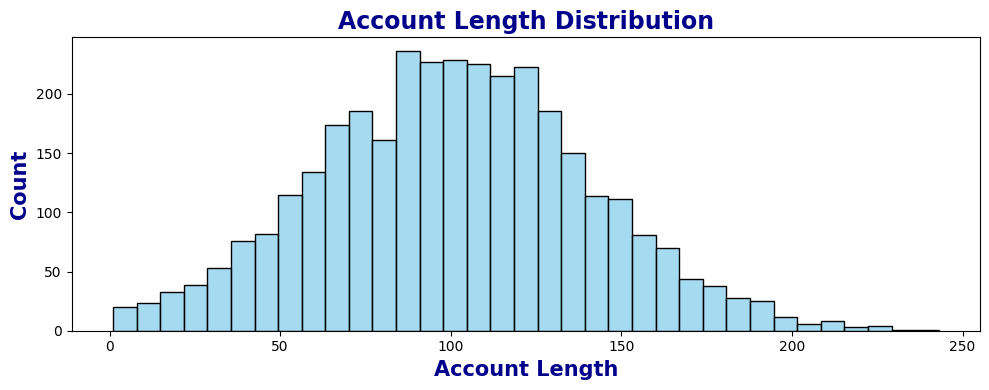

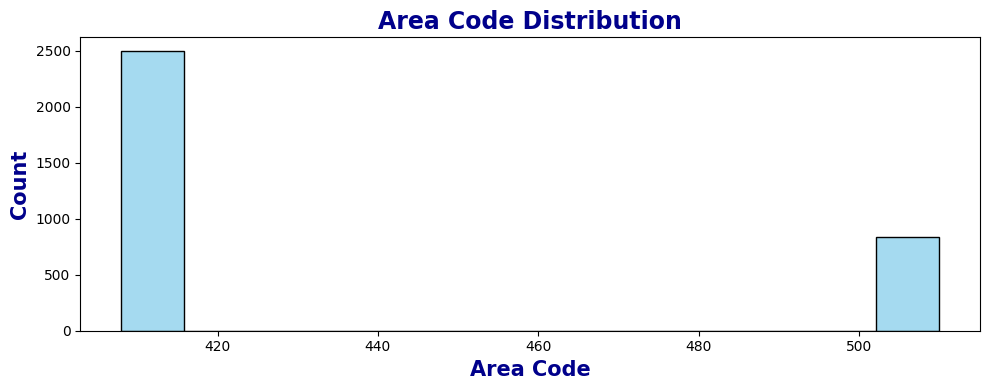

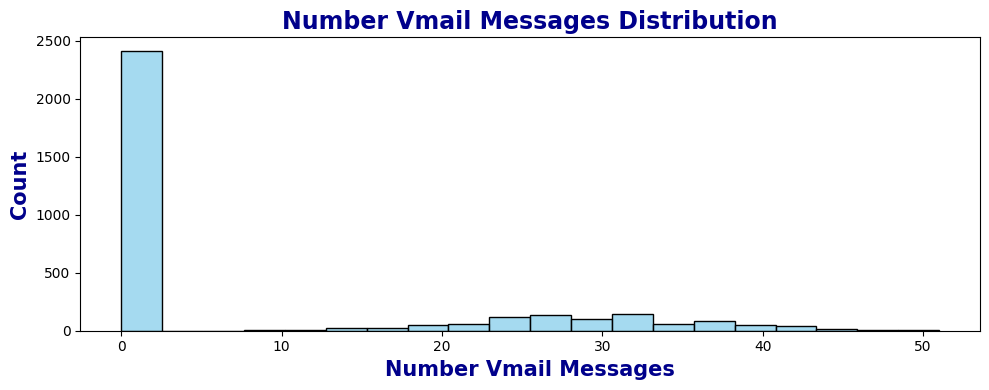

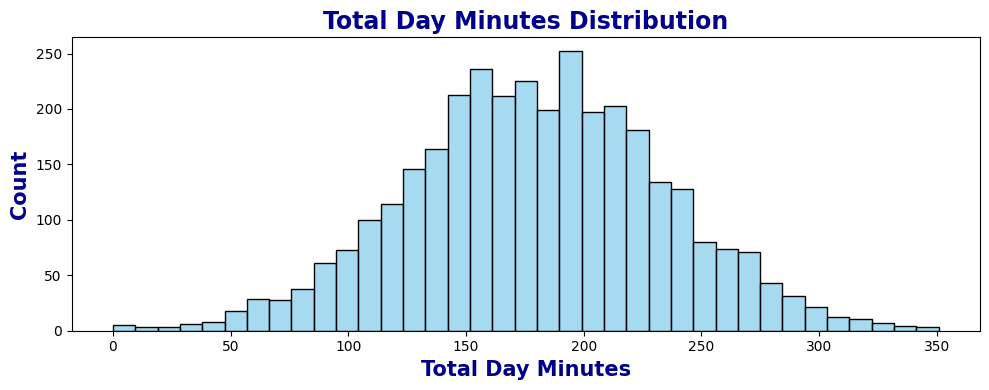

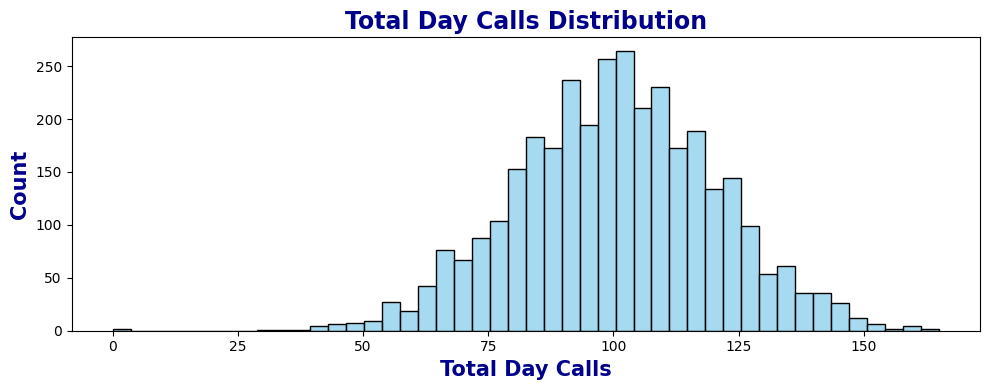

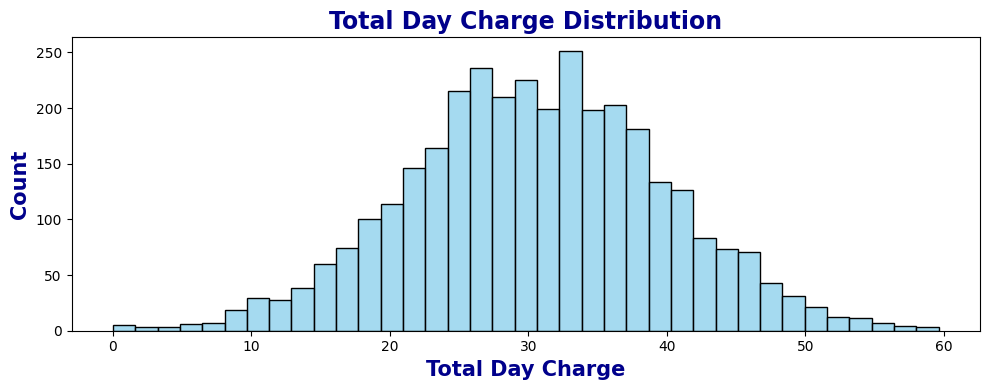

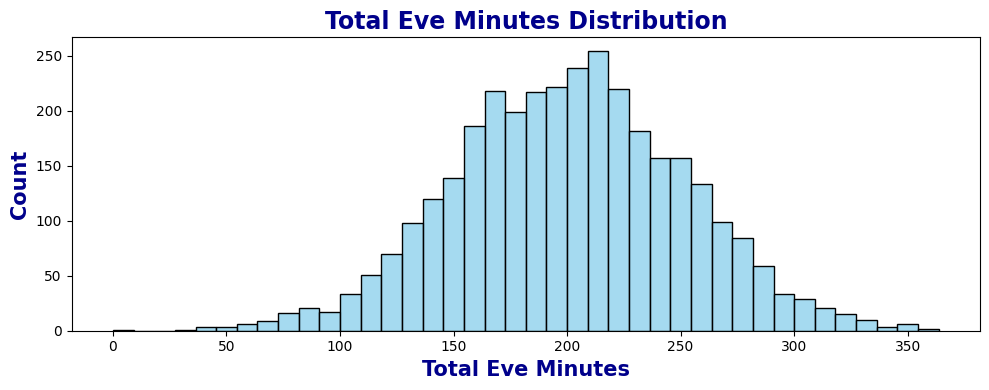

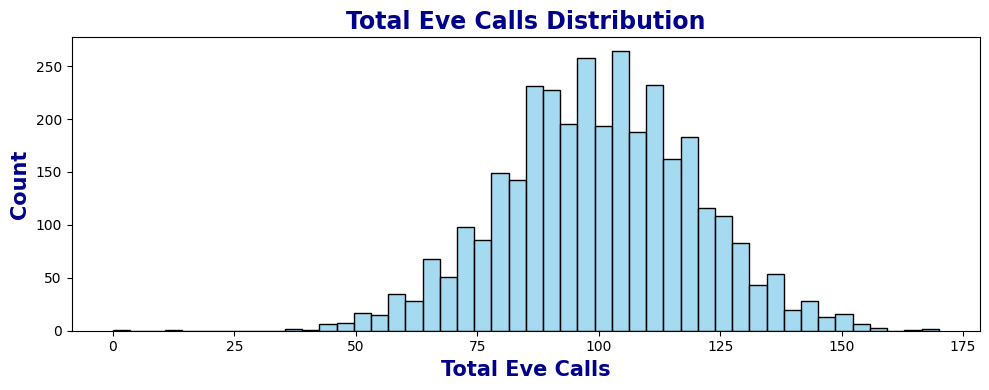

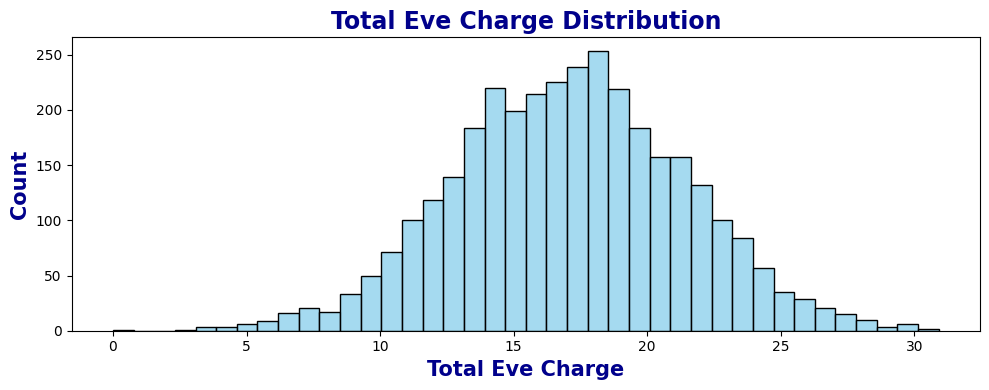

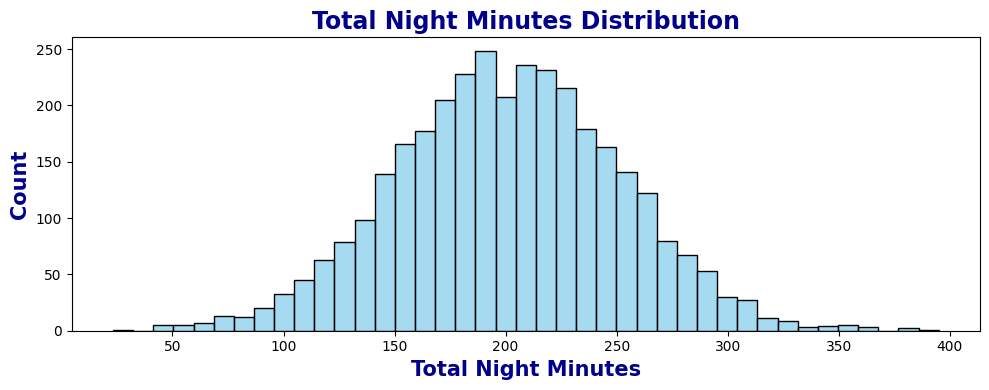

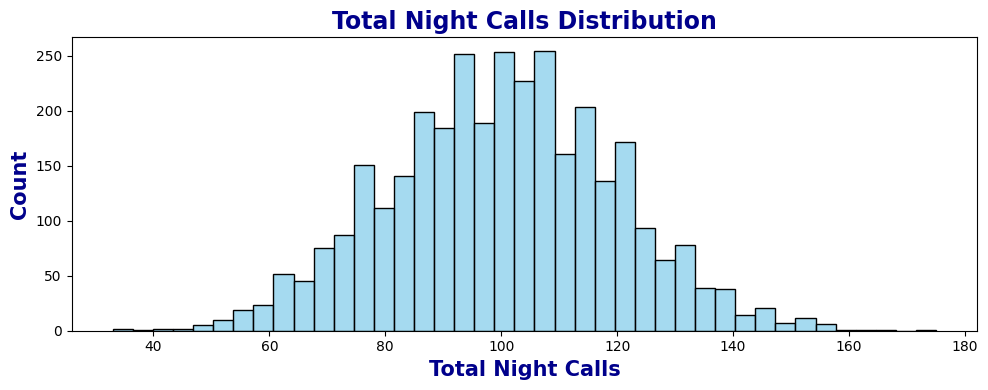

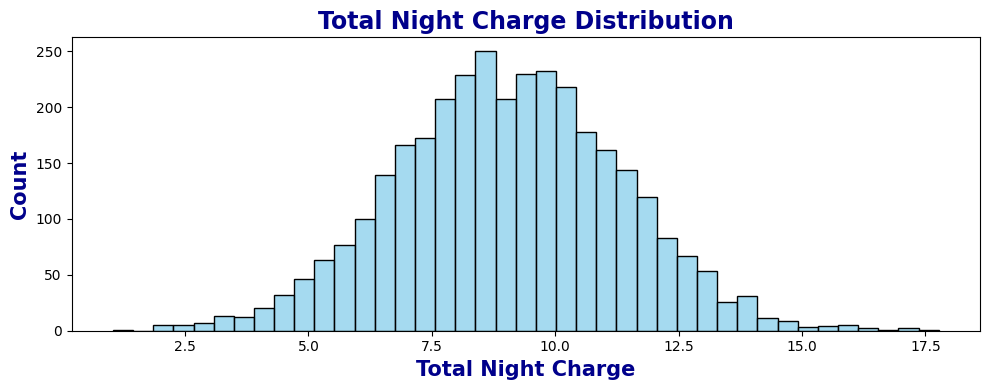

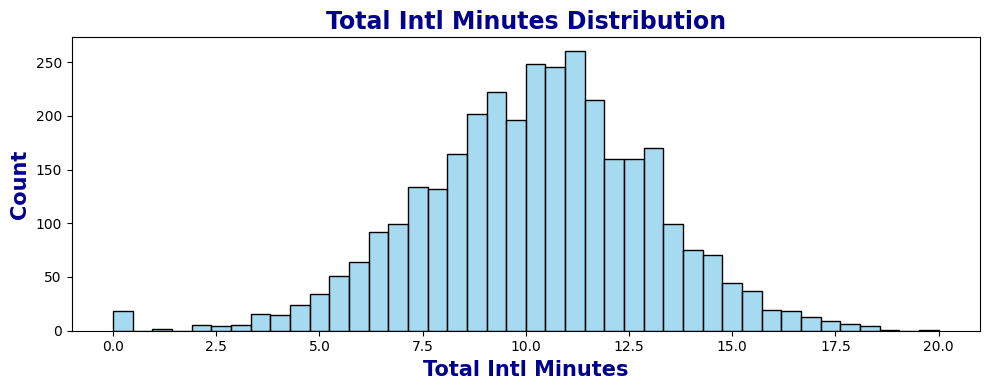

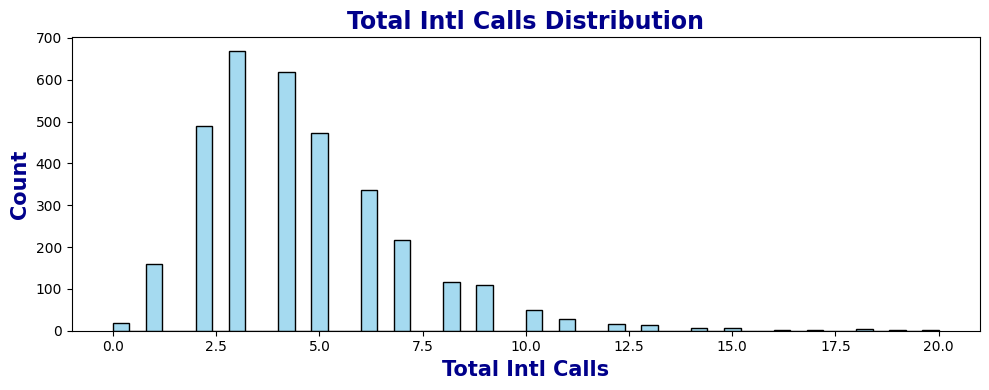

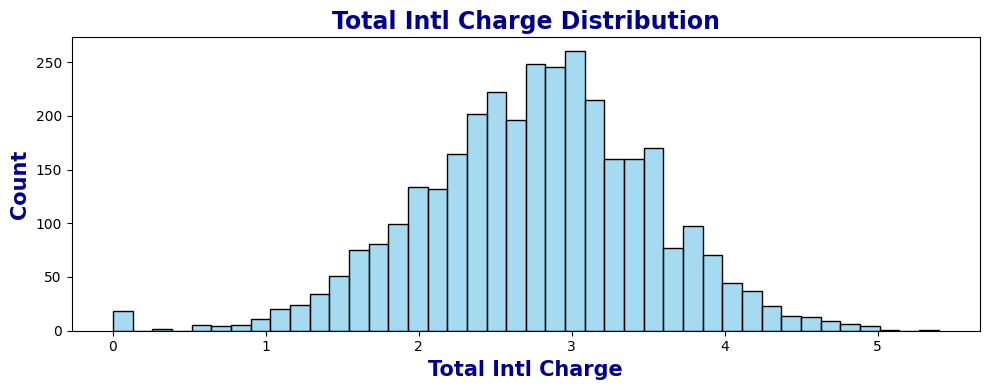

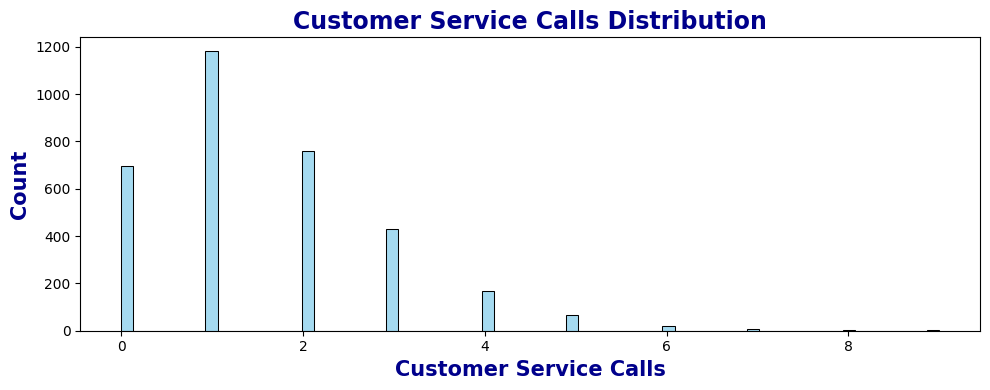

In [49]:
num_coln = st_df1.select_dtypes("number")

for col in num_coln:
    plt.figure(figsize=(10,4))
    sns.histplot(st_df1[col], bins='auto', color='skyblue', edgecolor='black')
    plt.xlabel(col.replace("_", " ").title(), fontsize=15, color='darkblue', fontweight='bold')
    plt.ylabel("Count", fontsize=15, color='darkblue', fontweight='bold')
    plt.title(f"{col.replace("_", " ").title()} Distribution",fontsize=17,color='darkblue',fontweight='bold')
    plt.tight_layout()
    plt.show();

Observation: 

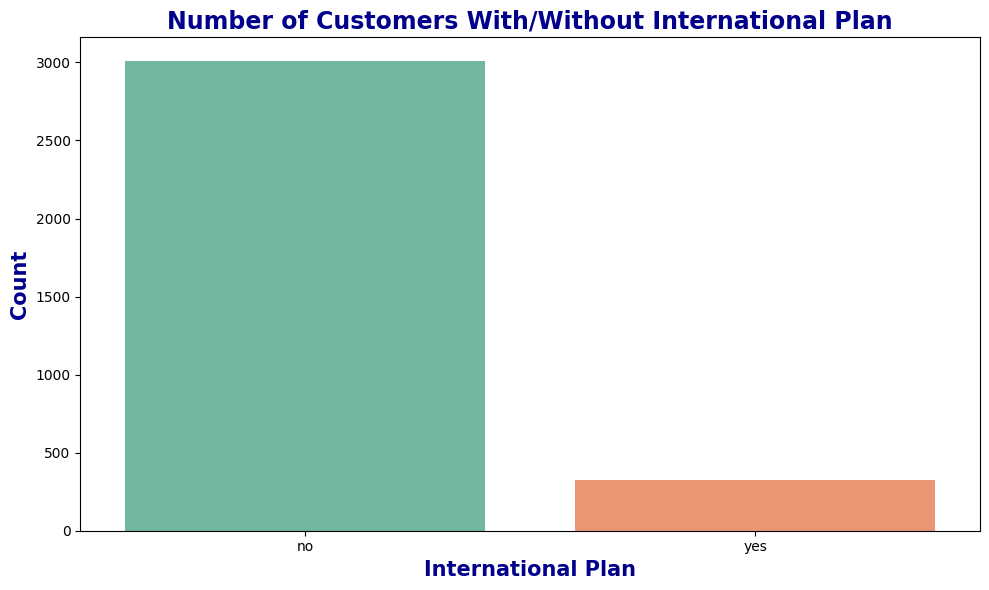

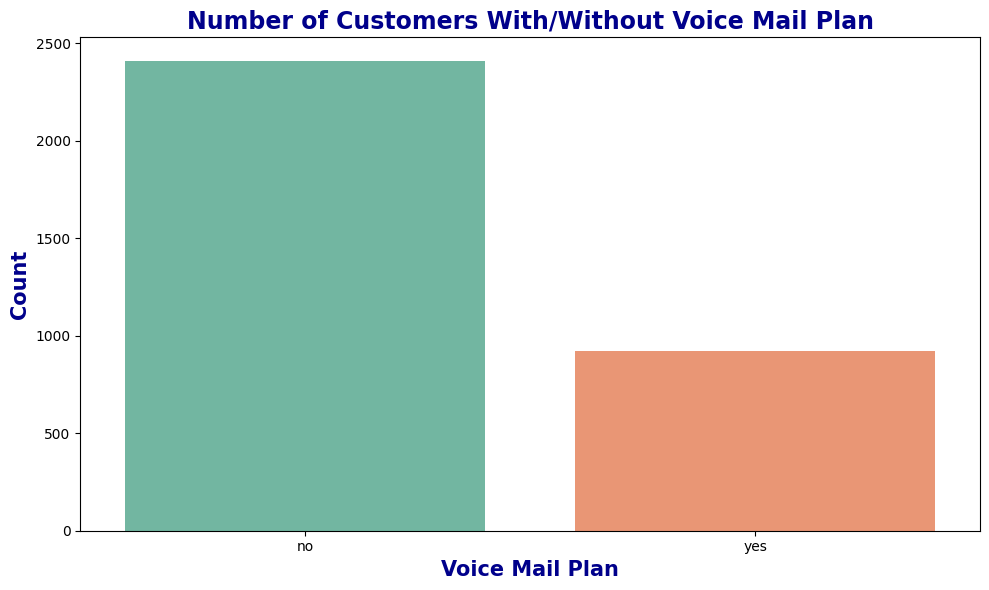

In [50]:

cat_coln = st_df1[["international_plan", "voice_mail_plan"]]

#titles for each column
title_map = {"international_plan": "Number of Customers With/Without International Plan",
            "voice_mail_plan": "Number of Customers With/Without Voice Mail Plan",}

for col in cat_coln:
    #sort categories by count 
    sorted_cat = st_df1[col].value_counts(ascending=False).index

    plt.figure(figsize=(10,6))
    sns.countplot(data=st_df1, x=col, palette='Set2', order=sorted_cat)
    plt.xlabel(col.replace("_", " ").title(), fontsize=15, color='darkblue', fontweight='bold')
    plt.ylabel("Count", fontsize=15, color="darkblue", fontweight='bold')
    plt.title(title_map[col], fontsize=17, color='darkblue', fontweight='bold')
    plt.tight_layout()
    plt.show();

Observation: 

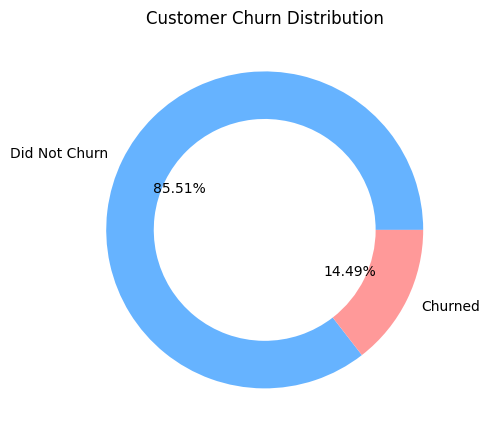

In [51]:
churned_count = st_df1.churn.value_counts(ascending=False)

labels = ["Did Not Churn", "Churned"]

#plot pie chart
plt.figure(figsize=(5,5))
plt.pie(churned_count, labels=labels, autopct="%.2f%%", colors=['#66b3ff','#ff9999'], wedgeprops=dict(width=0.3))
plt.title("Customer Churn Distribution")
plt.tight_layout()
plt.show();

Observation: There are more customers who stayed than the ones who churned, there is a class imbalance. 

In [52]:
#feature engineering, group states by region
region_map = {
    # Northeast
    'ME':'Northeast','NH':'Northeast','VT':'Northeast','MA':'Northeast','RI':'Northeast',
    'CT':'Northeast','NY':'Northeast','NJ':'Northeast','PA':'Northeast',

    # Midwest
    'OH':'Midwest','MI':'Midwest','IN':'Midwest','IL':'Midwest','WI':'Midwest',
    'MN':'Midwest','IA':'Midwest','MO':'Midwest','ND':'Midwest','SD':'Midwest',
    'NE':'Midwest','KS':'Midwest',

    # South
    'DE':'South','MD':'South','DC':'South','VA':'South','WV':'South',
    'NC':'South','SC':'South','GA':'South','FL':'South',
    'KY':'South','TN':'South','MS':'South','AL':'South',
    'OK':'South','TX':'South','AR':'South','LA':'South',

    # West
    'ID':'West','MT':'West','WY':'West','NV':'West','UT':'West','CO':'West',
    'AZ':'West','NM':'West','AK':'West','WA':'West','OR':'West','CA':'West','HI':'West'
}
#create region column
st_df1['region'] =st_df1['state'].map(region_map)
#verify
print(st_df1['region'].value_counts())


region
South        1109
West          831
Midwest       802
Northeast     591
Name: count, dtype: int64


Observation:

In [53]:
# # #feature engineering
# st_df1["total_day_minutes"] = pd.qcut(st_df1["total_day_minutes"], 10 )
# st_df1["total_eve_minutes"] = pd.qcut(st_df1["total_eve_minutes"], 10)
# st_df1["total_night_minutes"] = pd.qcut(st_df1["total_night_minutes"], 10 )
# st_df1["total_intl_minutes"] = pd.qcut(st_df1["total_intl_minutes"], 10)
# st_df1["customer_service_calls"] = pd.qcut(st_df1["customer_service_calls"], 10, duplicates="drop")
# st_df1["number_vmail_messages"] = pd.qcut(st_df1["number_vmail_messages"], 10, duplicates="drop" )




In [54]:
st_df1 = st_df1.drop("state", axis=1)

### Bivariate Analysis 

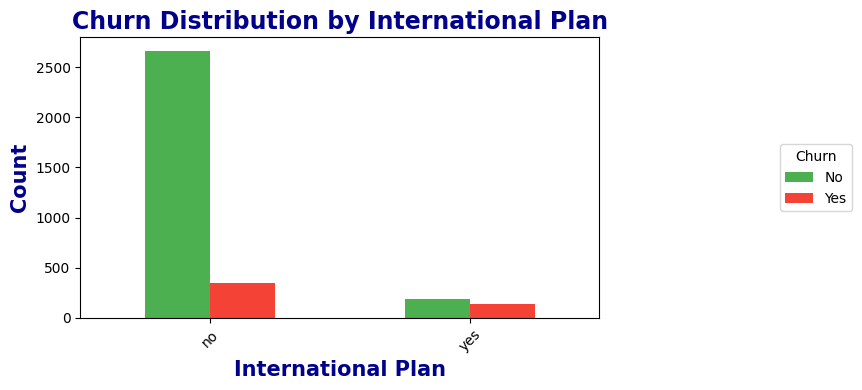

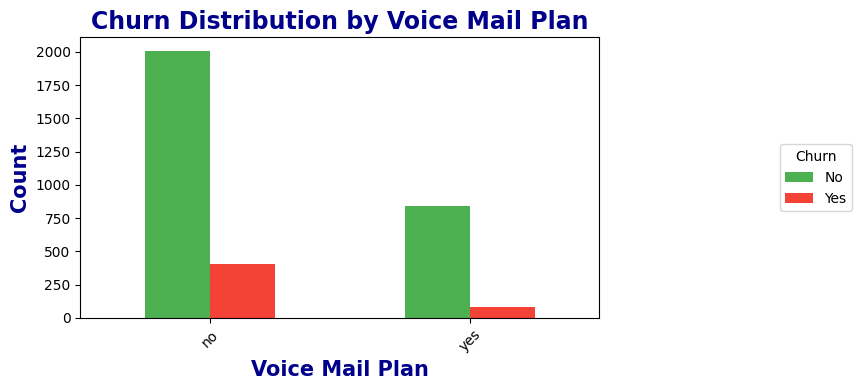

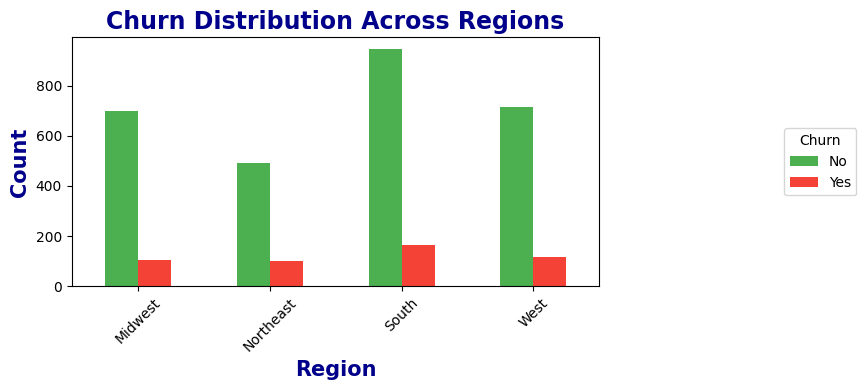

In [55]:
cat_coln = st_df1.select_dtypes(include=["category", "object"])

title_map = {"international_plan": "Churn Distribution by International Plan",
             "voice_mail_plan": "Churn Distribution by Voice Mail Plan",
             "region": "Churn Distribution Across Regions",
             "total_day_minutes": "Churn by Day Minutes Usage",
             "total_eve_minutes": "Churn by Evening Minutes Usage",
             "customer_service_calls": "Churn by Customer Service Calls",
             "total_night_minutes": "Churn by Night Minutes Usage",
             "total_ntl_minutes": "Churn by International Minutes Usage",
             "number_voicemail_messages": "Churn by Voicemail Messages"}
colors = ["#4CAF50", "#F44336"] 
for col in cat_coln:
    ct = pd.crosstab(st_df1[col], st_df1["churn"])
    ax = ct.plot(kind='bar', figsize=(10,4), color= colors)
    plt.xlabel(col.replace("_", " ").title(), fontsize=15, color='darkblue', fontweight='bold')
    plt.ylabel("Count", fontsize=15, color="darkblue", fontweight='bold')
    title = title_map.get(col, st_df1["churn"])
    plt.title(title, fontsize=17, color='darkblue', fontweight='bold')
    plt.legend(title="Churn", loc="center right", bbox_to_anchor=[1,0,0.5,1], labels=["No", "Yes"])
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show();

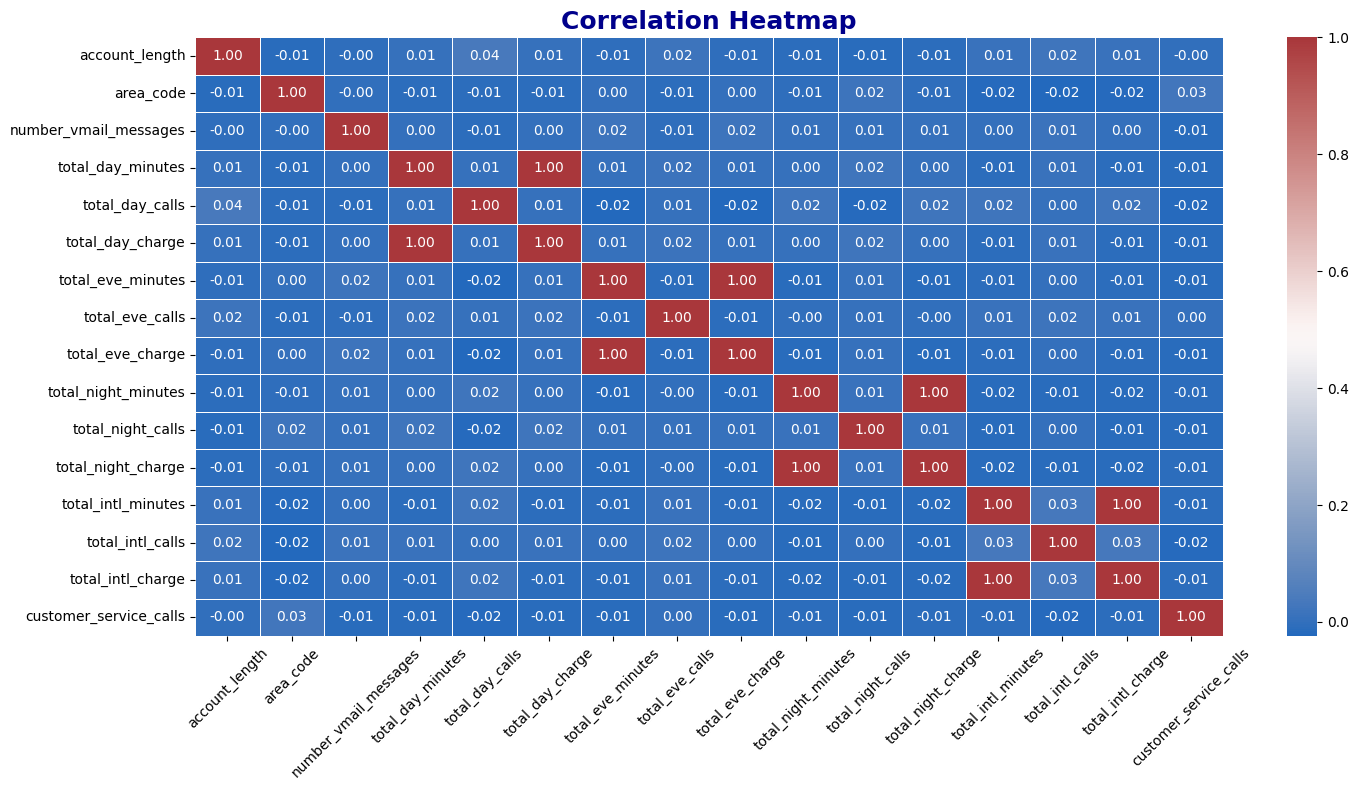

In [56]:
#Plot heatmap
corr = st_df1.select_dtypes("number").corr()
plt.figure(figsize=(15,8))
sns.heatmap(corr, annot=True, fmt=".2f", cmap="vlag", linewidths=0.5)
plt.title("Correlation Heatmap", fontsize=18, fontweight='bold', color='darkblue')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show(); 

Observation: The “minutes” features (like total_day_minutes, total_eve_minutes, total_night_minutes) show a perfect positive correlation (≈1.00) with their corresponding “charges” features (total_day_charge, total_eve_charge, total_night_charge).

This makes sense because charges are directly calculated from minutes (rate × minutes).

This also means you have redundant variables — you could drop either the minutes or the charges when modeling to avoid multicollinearity.

Other than that:

All other numeric variables have very low correlations with each other (close to 0). This suggests no strong linear relationships between the other independent variables.

Would you like me to also point out possible feature reduction steps (like dropping or combining variables) from this?

### ## Handling Multicollinearity in Our Dataset

Multicollinearity occurs when two or more independent variables are highly correlated. 
This can distort the coefficients of regression models and reduce interpretability.

### Why It Matters
- Inflates variance of coefficient estimates.
- Makes it difficult to determine the effect of each predictor.
- Can lead to overfitting and unstable predictions.

### Detecting Multicollinearity
1. **Correlation Matrix**  
   - Inspect pairwise correlations. 
   - Features with correlation coefficients |r| > 0.8 are potential multicollinearity issues.

2. **Variance Inflation Factor (VIF)**  
   - VIF > 5 (or >10) suggests high multicollinearity.

### Actions Taken in This Project
- **Dropped redundant features:** Removed either `*_minutes` or `*_charge` columns since they are perfectly correlated.
- **Considered feature selection:** Using VIF to retain only variables with acceptable collinearity.
- **Created binned features:** Replaced raw continuous values with categorized bins to simplify relationships.

### Benefits
- Reduces redundancy in the dataset.
- Improves model stability and interpretability.
- Ensures predictors independently contribute to explaining churn.



In [57]:
#drop highly correlaed columns
col_to_drop = ["area_code", "total_day_charge", "total_eve_charge", "total_night_charge", "total_intl_charge"]
st_df1.drop(col_to_drop, axis=1, inplace=True)
st_df1.head()

,account_length,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_eve_minutes,total_eve_calls,total_night_minutes,total_night_calls,total_intl_minutes,total_intl_calls,customer_service_calls,churn,region
0,128,no,yes,25,265.1,110,197.4,99,244.7,91,10.0,3,1,False,Midwest
1,107,no,yes,26,161.6,123,195.5,103,254.4,103,13.7,3,1,False,Midwest
2,137,no,no,0,243.4,114,121.2,110,162.6,104,12.2,5,0,False,Northeast
3,84,yes,no,0,299.4,71,61.9,88,196.9,89,6.6,7,2,False,Midwest
4,75,yes,no,0,166.7,113,148.3,122,186.9,121,10.1,3,3,False,South


### Multivariate Analysis 

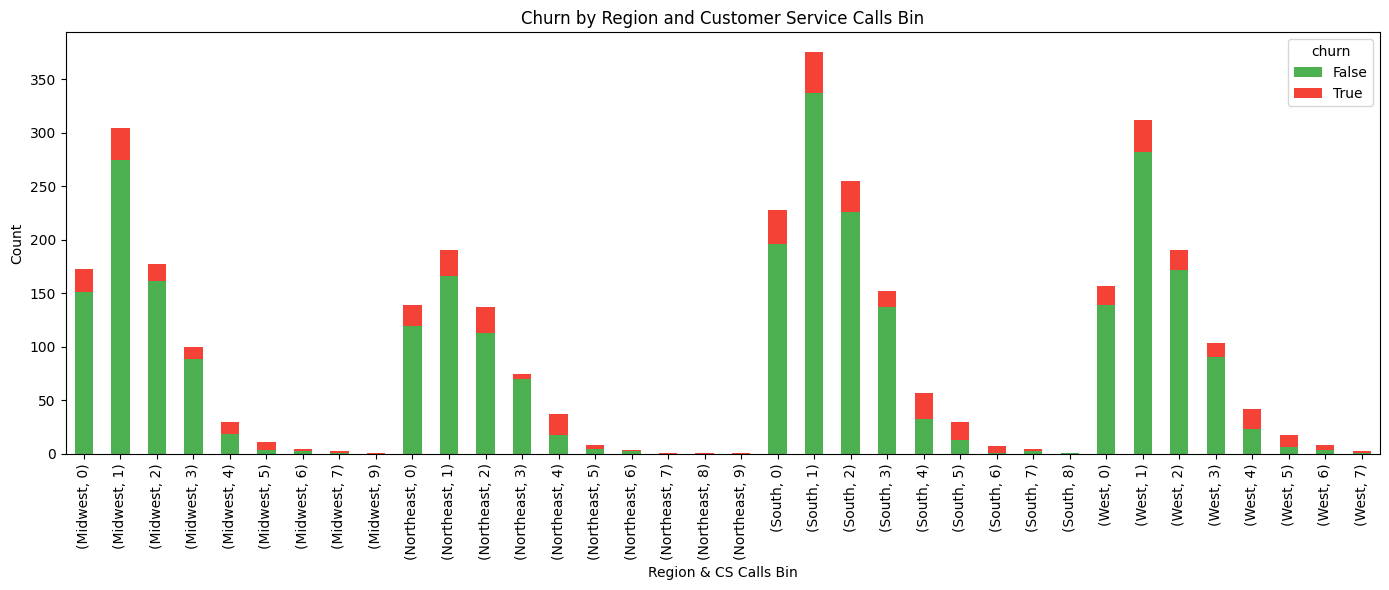

In [58]:
cross_tab = pd.crosstab([st_df1["region"], st_df1["customer_service_calls"]], st_df1["churn"])
cross_tab.plot(kind="bar", stacked=True, figsize=(14,6),
               color=["#4CAF50", "#F44336"])
plt.title("Churn by Region and Customer Service Calls Bin")
plt.xlabel("Region & CS Calls Bin")
plt.ylabel("Count")
plt.tight_layout()
plt.show()


# Data Preprocessing

In [59]:
#label encode  international plan, voice mail plan
le_international = LabelEncoder()
st_df1["international_plan"] = le_international.fit_transform(st_df1["international_plan"])

le_voicemail = LabelEncoder()
st_df1["voice_mail_plan"] = le_voicemail.fit_transform(st_df1["voice_mail_plan"])
# st_df1["total_day_minutes"] = le.fit_transform(st_df1["total_day_minutes"])
# st_df1["total_eve_minutes"] = le.fit_transform(st_df1["total_eve_minutes"])
# st_df1["total_night_minutes"] = le.fit_transform(st_df1["total_night_minutes"])
# st_df1["customer_service_calls"] = le.fit_transform(st_df1["customer_service_calls"])
# st_df1["number_vmail_messages"] = le.fit_transform(st_df1["number_vmail_messages"])
# st_df1["total_intl_minutes"] = le.fit_transform(st_df1["total_intl_minutes"])

st_df1 

,account_length,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_eve_minutes,total_eve_calls,total_night_minutes,total_night_calls,total_intl_minutes,total_intl_calls,customer_service_calls,churn,region
0,128,0,1,25,265.1,110,197.4,99,244.7,91,10.0,3,1,False,Midwest
1,107,0,1,26,161.6,123,195.5,103,254.4,103,13.7,3,1,False,Midwest
2,137,0,0,0,243.4,114,121.2,110,162.6,104,12.2,5,0,False,Northeast
3,84,1,0,0,299.4,71,61.9,88,196.9,89,6.6,7,2,False,Midwest
4,75,1,0,0,166.7,113,148.3,122,186.9,121,10.1,3,3,False,South
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,192,0,1,36,156.2,77,215.5,126,279.1,83,9.9,6,2,False,West
3329,68,0,0,0,231.1,57,153.4,55,191.3,123,9.6,4,3,False,South
3330,28,0,0,0,180.8,109,288.8,58,191.9,91,14.1,6,2,False,Northeast
3331,184,1,0,0,213.8,105,159.6,84,139.2,137,5.0,10,2,False,Northeast


In [60]:
coln_to_oh_ = ["region"]

coln_ohe = pd.get_dummies(st_df1[coln_to_oh_], drop_first=True, dtype="int")

#merge encoded values with the original dataset
merged_df = pd.concat([st_df1, coln_ohe], axis=1)

#drop the encoded columns
merged_df.drop(columns=coln_to_oh_,  inplace=True)
merged_df.head()

,account_length,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_eve_minutes,total_eve_calls,total_night_minutes,total_night_calls,total_intl_minutes,total_intl_calls,customer_service_calls,churn,region_Northeast,region_South,region_West
0,128,0,1,25,265.1,110,197.4,99,244.7,91,10.0,3,1,False,0,0,0
1,107,0,1,26,161.6,123,195.5,103,254.4,103,13.7,3,1,False,0,0,0
2,137,0,0,0,243.4,114,121.2,110,162.6,104,12.2,5,0,False,1,0,0
3,84,1,0,0,299.4,71,61.9,88,196.9,89,6.6,7,2,False,0,0,0
4,75,1,0,0,166.7,113,148.3,122,186.9,121,10.1,3,3,False,0,1,0


In [ ]:
#separate labels from features
X = merged_df.drop("churn", axis=1)
y = merged_df["churn"]

In [111]:
#separate train and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=42, stratify=y)


#check shape
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((2333, 16), (1000, 16), (2333,), (1000,))

In [112]:
#applying SMOTE
smote = SMOTE(random_state=42)
X_train_sm, y_train_sm = smote.fit_resample(X_train, y_train)


In [113]:
#scaling
ss = StandardScaler()
X_train_s = ss.fit_transform(X_train_sm)
X_test_s = ss.transform(X_test) 

#check shape
X_train_s.shape, X_test_s.shape, y_train_sm.shape, y_test.shape

((3990, 16), (1000, 16), (3990,), (1000,))

In [114]:
#logistic regression model
lr = LogisticRegression(random_state=42, max_iter=1000)
lr.fit(X_train_s, y_train_sm)

LogisticRegression(max_iter=1000, random_state=42)

In [115]:
print(f" The model score on training dataset is {lr.score(X_train_sm, y_train_sm)*100:.2f}%")

 The model score on training dataset is 50.00%


In [116]:
train_score = lr.score(X_train_sm, y_train_sm) * 100
test_score = lr.score(X_test_s, y_test) * 100
print(f"Train Accuracy: {train_score:.2f}%")
print(f"Test Accuracy: {test_score:.2f}%")
print(f"Gap: {train_score - test_score:.2f}% (low gap = good generalization)")

Train Accuracy: 50.00%
Test Accuracy: 72.90%
Gap: -22.90% (low gap = good generalization)


In [117]:
#check prediction and accuracy
y_pred = lr.predict(X_test_s)

#accuracy
print(f" The model accuracy score on test data is {accuracy_score(y_test, y_pred)*100:.2f}%")

 The model accuracy score on test data is 72.90%


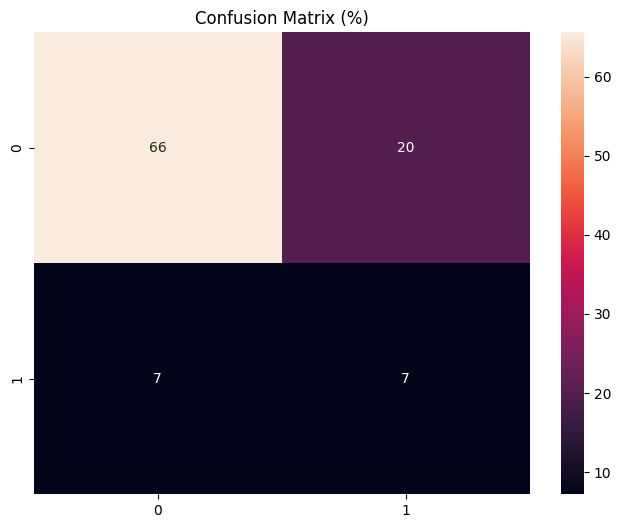

In [118]:
#comute confusion matrix
conf = confusion_matrix(y_test, y_pred)

#normalize to show percentages
conf_percent = conf / conf.sum()*100

#plot heatamap
plt.figure(figsize=(8,6))
sns.heatmap(conf_percent, annot=True, fmt=".0f")
plt.title("Confusion Matrix (%)")
plt.show();

In [120]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.90      0.77      0.83       855
           1       0.27      0.50      0.35       145

    accuracy                           0.73      1000
   macro avg       0.58      0.64      0.59      1000
weighted avg       0.81      0.73      0.76      1000



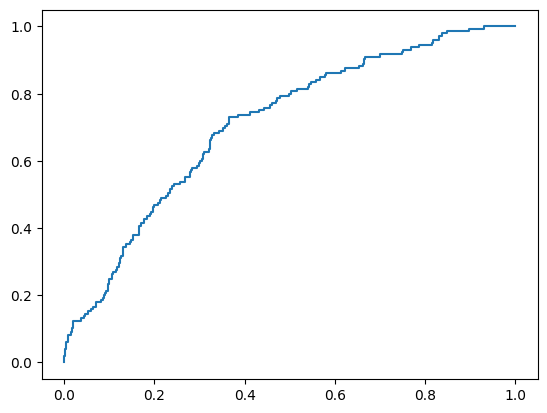

In [121]:
#create AUC
y_pred_proba = lr.predict_proba(X_test_s)[:,1]

fpr, tpr, threshold = roc_curve(y_test, y_pred_proba)

#plot
plt.plot(fpr, tpr);

In [90]:
#create decision tree
tree = DecisionTreeClassifier()
tree.fit(X_train_sm, y_train_sm) 

#check prediction and accuracy
y_pred = tree.predict(X_test_s)

#accuracy
print(f" The model accuracy score on test data is {accuracy_score(y_test, y_pred)*100:.2f}%")

 The model accuracy score on test data is 85.70%


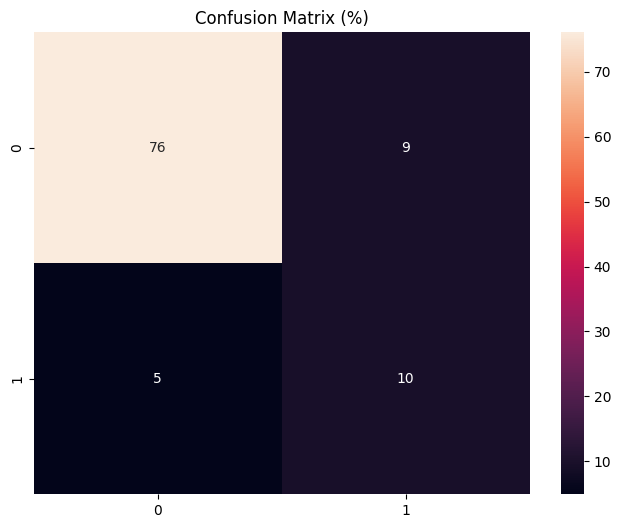

In [91]:
#comute confusion matrix
conf = confusion_matrix(y_test, y_pred)

#normalize to show percentages
conf_percent = conf / conf.sum()*100

#plot heatamap
plt.figure(figsize=(8,6))
sns.heatmap(conf_percent, annot=True, fmt=".0f")
plt.title("Confusion Matrix (%)")
plt.show();

In [92]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.94      0.89      0.91       855
           1       0.51      0.66      0.57       145

    accuracy                           0.86      1000
   macro avg       0.72      0.78      0.74      1000
weighted avg       0.88      0.86      0.86      1000



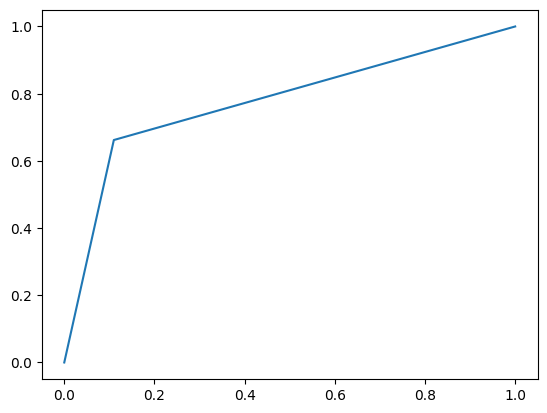

In [93]:
#create AUC
y_pred_proba = tree.predict_proba(X_test_s)[:,1]

fpr, tpr, threshold = roc_curve(y_test, y_pred_proba)

#plot
plt.plot(fpr, tpr);

In [94]:
#create random forest
rf = RandomForestClassifier()
rf.fit(X_train_sm, y_train_sm) 

#check prediction and accuracy
y_pred = rf.predict(X_test_s)

#accuracy
print(f" The model accuracy score on test data is {accuracy_score(y_test, y_pred)*100:.2f}%")

 The model accuracy score on test data is 92.40%


In [95]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.95      0.96       855
           1       0.73      0.77      0.74       145

    accuracy                           0.92      1000
   macro avg       0.84      0.86      0.85      1000
weighted avg       0.93      0.92      0.92      1000



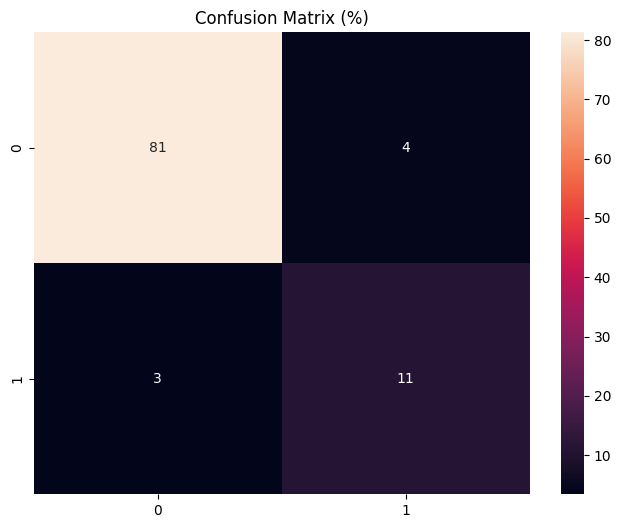

In [96]:
#comute confusion matrix
conf = confusion_matrix(y_test, y_pred)

#normalize to show percentages
conf_percent = conf / conf.sum()*100

#plot heatamap
plt.figure(figsize=(8,6))
sns.heatmap(conf_percent, annot=True, fmt=".0f")
plt.title("Confusion Matrix (%)")
plt.show();

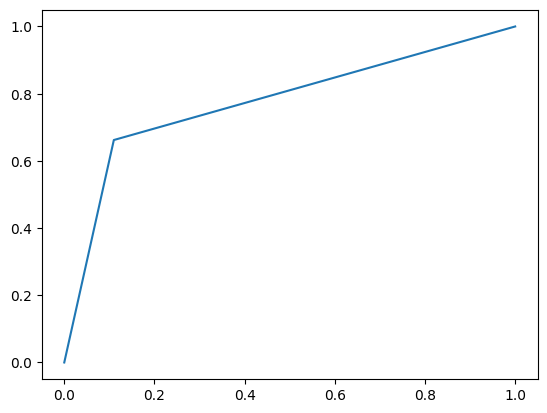

In [97]:
#create AUC
y_pred_proba = tree.predict_proba(X_test_s)[:,1]

fpr, tpr, threshold = roc_curve(y_test, y_pred_proba)

#plot
plt.plot(fpr, tpr);

In [98]:
#create decision tree
boost = XGBClassifier()
boost.fit(X_train_sm, y_train_sm) 

#check prediction and accuracy
y_pred = boost.predict(X_test_s)

#accuracy
print(f" The model accuracy score on test data is {accuracy_score(y_test, y_pred)*100:.2f}%")

 The model accuracy score on test data is 93.50%


In [99]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.97      0.96       855
           1       0.80      0.73      0.77       145

    accuracy                           0.94      1000
   macro avg       0.88      0.85      0.86      1000
weighted avg       0.93      0.94      0.93      1000



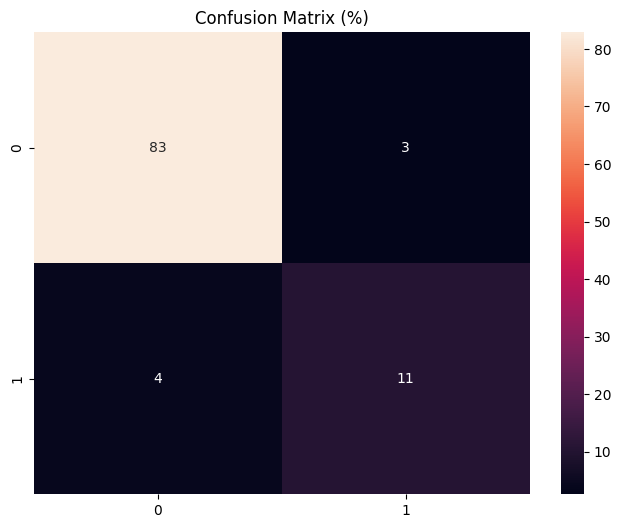

In [100]:
#comute confusion matrix
conf = confusion_matrix(y_test, y_pred)

#normalize to show percentages
conf_percent = conf / conf.sum()*100

#plot heatamap
plt.figure(figsize=(8,6))
sns.heatmap(conf_percent, annot=True, fmt=".0f")
plt.title("Confusion Matrix (%)")
plt.show();

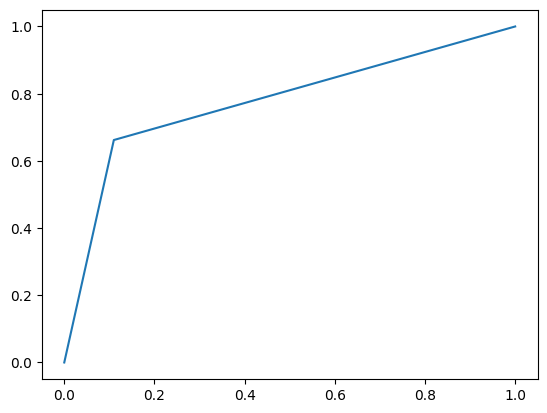

In [101]:
#create AUC
y_pred_proba = tree.predict_proba(X_test_s)[:,1]

fpr, tpr, threshold = roc_curve(y_test, y_pred_proba)

#plot
plt.plot(fpr, tpr);

### Hyperparameter Tuning

In [102]:
#GridSearchCV
param_grid = {"criterion": ["gini", "entropy"],
              "max_depth": [3, 5, 7, 8, None],
              "min_samples_split":[2, 5, 8, 10]
              }

#Instantiate gridsearch
grid_search = GridSearchCV(estimator=tree, param_grid=param_grid, cv=5, scoring='recall')
grid_search.fit(X_train_sm, y_train_sm)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 5, 7, 8, None],
                         'min_samples_split': [2, 5, 8, 10]},
             scoring='recall')

In [97]:
grid_search.best_params_

{'criterion': 'entropy', 'max_depth': None, 'min_samples_split': 2}

In [104]:
#Recreate the tree model with the best params
tree1 = DecisionTreeClassifier(criterion="entropy", max_depth=None, min_samples_split=2)

#Train the model
tree1.fit(X_train_sm, y_train_sm)

#Check score
tree1.score(X_train_sm, y_train_sm)

1.0

In [105]:
#Predict
y_pred = tree1.predict(X_test_s)

#Check accuracy
acc1 = print(f" The model accuracy is {accuracy_score(y_test, y_pred)*100:.2f}%")
acc1

 The model accuracy is 86.60%


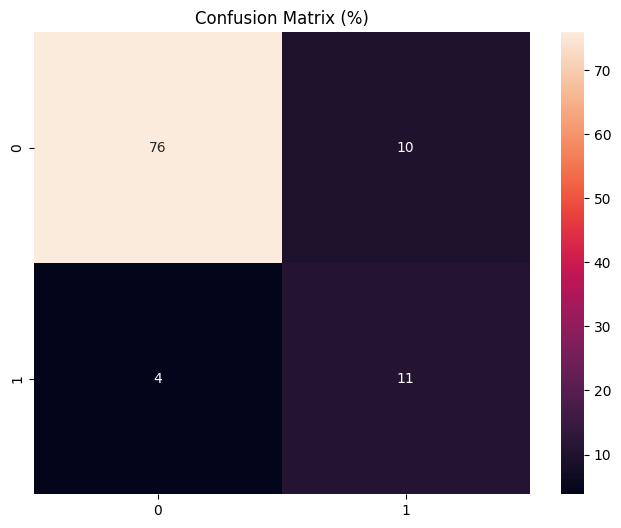

In [106]:
#comute confusion matrix
conf = confusion_matrix(y_test, y_pred)

#normalize to show percentages
conf_percent = conf / conf.sum()*100

#plot heatamap
plt.figure(figsize=(8,6))
sns.heatmap(conf_percent, annot=True, fmt=".0f")
plt.title("Confusion Matrix (%)")
plt.show();

In [107]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.89      0.92       855
           1       0.53      0.74      0.61       145

    accuracy                           0.87      1000
   macro avg       0.74      0.81      0.77      1000
weighted avg       0.89      0.87      0.87      1000



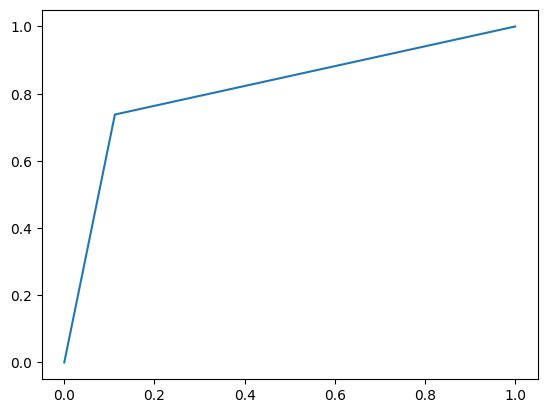

In [108]:
y_pred_proba = tree1.predict_proba(X_test_s)[:,1]

fpr, tpr, threshold = roc_curve(y_test, y_pred_proba)

plt.plot(fpr, tpr);

In [110]:
#Create param distribution
param_dist_xgb ={"max_depth": randint(1, 10),
                 "n_estimators": randint(2, 20)
              }

#Instantiate the random search
random_search = RandomizedSearchCV(estimator=boost, param_distributions=param_dist_xgb, \
                                   n_iter=10, cv=5, scoring="recall", random_state=42)
random_search.fit(X_train_sm, y_train_sm)

RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, device=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, feature_types=None,
                                           feature_weights=None, gamma=None,
                                           grow_policy=None,
                                           importance_type=None,
                                           interaction_constrain...
                                           min_child_weight=None, missing=nan,
                                           monotone_constraints=None,
                                           multi_strategy=None,
                                           n_estimators=None, n_jobs=None,
                                           num_parallel_tree=None, ...),
                   param_distributions={'max_depth': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x000002517B013410>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x000002517B011D60>},
                   random_state=42, scoring='recall')

In [117]:
#Check best params
random_search.best_params_

{'max_depth': 7, 'n_estimators': 16}

In [118]:
#Instantiate the model 
boost2 = XGBClassifier(max_depth=7, min_samples_split=16)

#Train the model
boost2.fit(X_train_s, y_train_sm)

#Check score
boost2.score(X_train_s, y_train_sm)

1.0